In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [84]:
data = np.array([[0.5797908, 0.8542900, -0.3336117, 0.6614812, 0.3068605, -0.5592255, 1.8171393, 1.1906095, 0.3224013, 1.3736463, 1.9349496, 1.0027555], 
                 [0.2503102, 0.7070853, -0.2067910, 0.2537762, 0.2761426, -0.5128023, 0.9424134, 0.5792497, 0.3282447, 0.7372653, 1.5215567, 1.0285857], 
                 [0.3641669, 0.8581409, -0.2615153, 0.3822419, 0.4633060, 0.1246041, 0.9330426, 0.7459362, 0.5318198, 1.2240497, 1.7265957, 0.4350972],
                 [0.34274011, 0.67617733, 0.02361339, 0.32549511, 0.26390166, 0.449509, 2.2839732,  0.90723957, 0.11051672, 0.49976257, 1.53241402, 1.33376881],
                 [0.2631343, 0.7715416, -0.7669706, 0.2491758, 0.3997463, -0.5508468, 1.1331557, 0.9475772, 0.4137079, 0.6380679, 1.5419426, 0.9793449],
                 [0.21681416, 0.49632912, -0.40190027, 0.22941637, 0.06849415, 0.00605466, 0.63465268, 0.07338133, 0.19121257, 0.58589184, 1.35301710, 0.98493794],
                 [0.4789133, 0.9324546, -0.1578271, 0.4485489, 0.5552547, 0.2213046, 1.4395107, 1.1837184, 0.9589468, 1.6224732, 1.9823570, 0.2990245],
                 [0.35657961, 0.71657554, -0.03882856, 0.32255801, 0.44819194, 0.47444455, 2.02646572, 0.97217783, 0.18052693, 0.72153478, 1.63384188, 1.26577222],
                 [0.08976476, 0.49273533, -1.08544242, 0.06587322, 0.10594527, -0.64501337, -0.02751082, 0.08190390, 0.46358034, 0.30292447, 1.16545017, 0.30161220],
                 [0.42619349, 0.57439273, -0.21513164, 0.39526151, 0.20270132, 0.01263675, 0.88828010, 0.60538541, 0.35184073, 1.39523242, 1.61450219, 0.08321010],
                 [-0.12941692, -0.15715773,  0.03261392, -0.04800513, -0.05031259, -0.79574875, -0.28447877, -0.1691337,   0.01145257, -0.35483239, -0.41254079, -0.09590742],
                 [0.40450125,  0.90363898, -0.21788085,  0.4156645,   0.5099509,   0.18206188,  0.97716297,  0.81165015,  0.98920987,  1.44292315,  1.8357373,   0.35432875],
                 [0.22674653,  0.59869862, -0.26374676,  0.13499574,  0.33445319,  0.0945192,  0.67209163,  0.60109998,  0.35201477,  0.88261719,  1.19523156,  0.06156786],
                 [-0.00876361,  0.1506837,  -0.43154949, -0.10458741,  0.01340754, -0.55373973, -0.39358687, -0.32683783,  0.26842941, -0.16735853,  0.5187789,   0.08009066],
                 [0.25516882,  0.52528848, -0.8522975,   0.18266211,  0.24125381, -0.56749881,  1.02625188,  0.61833836,  0.21767355,  0.48971538,  1.07957824,  0.22016538],
                 [-0.10702597, -0.23486506, -1.04997014, -0.15431143, -0.24584097, -0.85086072, -0.31776513, -0.7706525,  -0.01126436, -1.32570861,  0.15590081,  1.02305826],
                 [-0.00540905,  0.33304518, -0.89992078, -0.02705311, -0.05745327, -0.84489002,  0.81022402,  0.30262035,  0.14096877, -0.5861714,   0.61882798,  1.14628222],
                 [0.07784108,  0.50592909, -0.38321652,  0.07018633,  0.04168443, -0.7356315, 1.08933029,  0.53194877,  0.16659094, -0.05968202,  1.01597694,  1.16316094],
                 [0.24305883,  0.6572749,  -0.15811164,  0.27918629,  0.23785515,  0.13849777,  1.14260247,  0.80295149,  0.33914862,  0.76045831,  1.30461193,  0.99814453],
                 [0.36297663,  0.35796091,  0.06828857,  0.43206479,  0.23836639, -0.56528012,  1.18248665,  1.11722815,  0.13118871,  0.78775444,  0.58193252,  0.01781758],
                 [0.22229931, 0.23548692, 0.36581445, 0.16288185, 0.28037232, 0.27743109, 1.26350175, 0.92776086, 0.03321246, 0.46226172, 0.40233931, 0.15468614],
                 [0.14735273,  0.36181176,  0.14038498,  0.1528255,   0.39481187,  0.11854943,  0.29838994,  0.67255482,  0.34060718,  0.63815782,  0.37357857, -0.5498407],
                 [0.12592596,  0.17984821,  0.42551366,  0.09607874,  0.19540751,  0.44345434,  1.64932052,  0.83385824, -0.08069585, -0.08612927,  0.17939691,  0.34883087],
                 [0.04632016,  0.2752125,  -0.36507029,  0.01975938,  0.33125217, -0.55690143,  0.49850303,  0.87419591,  0.22249537,  0.05217604,  0.18892553, -0.00559301],
                 [0.2620991,  0.43612546, 0.24407317,  0.21913249,  0.48676051,  0.21524992, 0.80485807, 1.11033709, 0.76773425,  1.03658133,  0.62933992, -0.6859134],
                 [0.13976546,  0.22024642,  0.36307171,  0.09314164,  0.37969779,  0.46838988,  1.39181304,  0.8987965,  -0.01068565,  0.13564294,  0.28082478,  0.28083429],
                 [-0.21681416, -0.49632912,  0.40190027, -0.22941637, -0.06849415, -0.00605466, -0.63465268, -0.07338133, -0.19121257, -0.58589184, -1.3530171,  -0.98493794],
                 [-0.5775849,  -0.81622811,  0.24999755, -0.53176482, -0.39717612, -0.90101293, -1.63327616, -0.54040567, -0.06114115, -2.61367892, -1.53288733,  0.30008736],
                 [0.81732211,  0.44416643,  0.3213159,   0.74903417,  0.58520372,  0.2568717,  2.11622137,  1.4097953,  -0.00543302,  1.4087502,   0.93150017,  0.11639038],
                 [0.91096226, 0.74733574, 0.17517482, 0.86911922, 0.72382918, 0.04136141, 2.54423061, 1.81886188, 0.03503589, 1.50622413, 1.24420239, 0.21537066],
                 [0.00993237,  0.1023695,   0.13815351, -0.09442063,  0.26595904,  0.08846454,  0.03743895,  0.52771865,  0.1608022,   0.29672535, -0.15778554, -0.92337008],
                 [0.03835467,  0.02895936, -0.45039723, -0.04675426,  0.17275966, -0.57355347,  0.3915992,   0.54495703,  0.02646098, -0.09617646, -0.27343887, -0.76477255],
                 [-0.32384013, -0.73119418, -0.64806987, -0.3837278,  -0.31433512, -0.85691539, -0.95241781, -0.84403383, -0.20247694, -1.91160045, -1.19711629,  0.03812032],
                 [-0.22222321, -0.16328394, -0.49802051, -0.25646948, -0.12594742, -0.85094469,  0.17557134,  0.22923902, -0.05024381, -1.17206324, -0.73418912,  0.16134428],
                 [0.02624467,  0.16094578,  0.24378863,  0.04976992,  0.169361,    0.1324431,  0.50794979,  0.72957016,  0.14793605,  0.17456647, -0.04840517,  0.0132066],
                 [0.56285705, 0.44346789, 0.17154089, 0.51211532, 0.43423162, 0.09330873, 1.53713486, 1.30133385, 0.03164547, 0.78243506, 0.72213708, 0.20722497],
                 [-0.46115791, -0.10471586,  0.1140778,  -0.49189767, -0.1174489,   0.11870492, -0.22094854,  0.19440943,  0.02104516, -1.0965927,  -0.4592473,   0.19611328],
                 [-0.50562049, -0.90300801, -0.85540107, -0.48968641, -0.41455696, -0.99943194, -2.35322887, -0.5838319,   0.02754092, -1.95504949, -1.90016113, -1.0529286],
                 [0.00985227,  0.01925674,  0.44438425, -0.0499646,   0.0424331,   0.38145024,  0.90608765,  0.30589039, -0.08665397, -0.29543556,  0.00939968,  0.31901538],
                 [6.59797619e-02,  4.49553145e-02,  3.03659957e-01, -5.27519452e-04,  2.30648568e-01, 4.01383742e-01,  9.76077782e-01,  5.28643945e-01, -4.29181832e-02, -8.58189790e-04,  8.18424770e-02,  2.12378855e-01],
                 [0.11002335,  0.16888699,  0.36668992,  0.05416437,  0.31852832,  0.45440058,  1.002267,    0.51445025, -0.03739046,  0.00138014,  0.21297641,  0.30326537],
                 [0.12615422,  0.21655523,  0.37490213,  0.08163284,  0.37721592,  0.46997745,  1.3813649,   0.89257502, -0.00982976,  0.10818692,  0.2687864,   0.28729402],
                 [-0.18908685, -0.80015802, -0.8055471,  -0.0920716,  -0.22672218, -0.83951417, -1.39141298, -0.35622497,  0.01137448, -2.17361184, -1.47287996,  0.08683308],
                 [0.19415798, 0.21750891, 0.22891973, 0.21172224, 0.23840567, 0.16761224, 0.69806167, 0.50546902, 0.04346454, 0.38920626, 0.35101457, 0.17095581],
                 [-0.47314278, -0.79281753,  0.30248451, -0.3798873,  -0.39091419, -0.66569726, -1.68732252, -0.46177644, -0.03326156, -0.63926673, -1.77899577, -1.13178109],
                 [-0.20358464, -0.39914841,  0.07755094, -0.23354101, -0.06619211, -0.58200037, -1.07023684,  0.08960165,  0.11077168, -0.74444408, -0.95434166, -0.86786614],
                 [-0.15356541, -0.4446797,  -0.5549176,  -0.18242562, -0.20193208, -0.64753542, -0.52657447, -0.49005604, -0.06765385, -0.25530307, -0.68669535, -0.88672486],
                 [-0.167097,   -0.65620411,  0.21477768, -0.09549504, -0.09745511, -0.72893715, -0.37609846, -0.13116629, -0.11271286, -2.14606235, -1.35458211,  0.25428801],
                 [0.10087753, -0.07816455, -0.1757846,   0.2129323,  -0.24839412, -0.78053004,  0.37762858,  0.00689107, -0.63654554, -0.24882689, -0.0474074,   0.70373098],
                 [-0.22860309, -0.22536926, -0.04896386, -0.19477263, -0.27911201, -0.73410687, -0.49709738, -0.60446872, -0.63070209, -0.88520783, -0.46080033,  0.72956113]
                ])

targets = np.array([0.06, 0.14, 0.06, 1.05, 0.27, 0.27, -0.35, 0.90, 0.44, 0.52, 0.57, -1.40, 0.45, 0.50, 
                    0.36, -1.10, -0.94, -0.18, 0.45, -0.21, -2.13, -0.21, 0.78, 0.00, -0.62, 0.63, -0.27, 
                    -0.55, -0.07, 0.03, 0.18, 0.09, -1.37, -1.21, 0.18, -0.07, -0.15, -0.21, 0.76, 0.43, 
                    0.26, 0.21, 1.02, 0.77, -0.08, 0.47, -0.28, -0.34, 0.41, 0.49]) 

In [85]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [86]:
pca = PCA(n_components=2)

In [87]:
# Perform PCA
principal_components = pca.fit_transform(data_scaled)

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

AttributeError: 'function' object has no attribute 'remove'

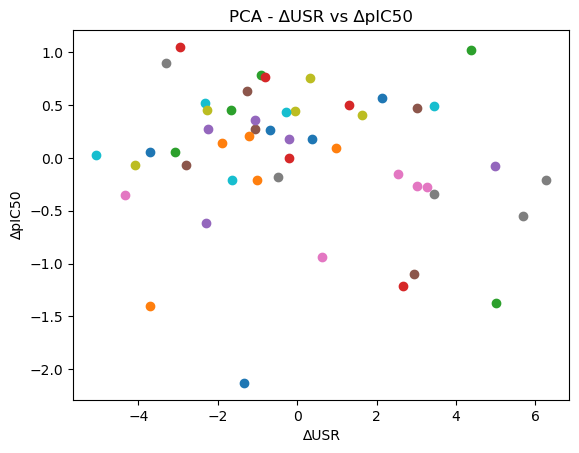

In [88]:
# Plotting
for i in range(len(data)):
    plt.scatter(principal_components[i, 0], targets[i], label=f'Array {i+1}')
plt.xlabel('∆USR')
plt.ylabel('∆pIC50')
plt.title('PCA - ∆USR vs ∆pIC50')
plt.legend.remove()
plt.show()